# Travel Insurance Prediction

Final Project Rakamin Data Science Batch 39 by Byte Blazers

## EDA, Insights & Visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
# Apply the default theme
sns.set_theme()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TravelInsurancePrediction.csv to TravelInsurancePrediction (2).csv


In [ ]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### 1. Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.duplicated().any()

True

In [ ]:
#Menangani Data Duplikat:
duplicate_rows = df[df.duplicated()]

# Menghapus data duplikat
df = df.drop_duplicates()
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
# Mendeteksi nilai yang hilang
missing_values = df.isnull().sum()

# Menghapus baris yang mengandung nilai yang hilang
df = df.dropna()
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1249 non-null   int64 
 1   Employment Type      1249 non-null   object
 2   GraduateOrNot        1249 non-null   object
 3   AnnualIncome         1249 non-null   int64 
 4   FamilyMembers        1249 non-null   int64 
 5   ChronicDiseases      1249 non-null   int64 
 6   FrequentFlyer        1249 non-null   object
 7   EverTravelledAbroad  1249 non-null   object
 8   TravelInsurance      1249 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 97.6+ KB


In [ ]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [ ]:
#Menambah Category Income

# Explore AnnualIncome columns
df['AnnualIncome'].describe()

# Categorizing AnnualIncome
bins = [0, 600000, 1250000, 1800000] # 0-600.000 -> low / 600.001 - 1.250.000 -> mid / 1.250.001 - 1.800.000 -> high
groupNames = ["low", "mid", "high"]
df['CatAnIncome'] = pd.cut(df['AnnualIncome'], bins, labels = groupNames, include_lowest = True)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,CatAnIncome
0,31,Government Sector,Yes,400000,6,1,No,No,0,low
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,mid
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,low
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,mid
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,mid


In [ ]:
#function for coverting binary to yes/no

def convert_binary_to_yesno(x):
    if x == 1:
        return "Yes"
    else:
        return "No"
df['ChronicDiseases'] = df['ChronicDiseases'].apply(convert_binary_to_yesno)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,CatAnIncome
0,31,Government Sector,Yes,400000,6,Yes,No,No,0,low
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0,mid
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1,low
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0,mid
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0,mid


In [ ]:
df['TravelInsurance'] = df['TravelInsurance'].apply(convert_binary_to_yesno)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,CatAnIncome
0,31,Government Sector,Yes,400000,6,Yes,No,No,No,low
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No,mid
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Yes,low
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No,mid
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,No,mid


Kami mengubah value `TravelInsurance` dan `ChronicDiseases` dari binary ke object Yes or No

In [ ]:
# pengelompokan berdasar jenis untuk melihat sari sisi numeric dan kategori
cat = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad','TravelInsurance','ChronicDiseases']
num = ['Age', 'AnnualIncome','FamilyMembers']

In [ ]:
df.describe()

,Age,AnnualIncome,FamilyMembers
count,1249.000000,1.249000e+03,1249.000000
mean,29.755805,9.345476e+05,4.890312
std,2.921039,3.607293e+05,1.762313
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.200000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


**Pengamatan Numerical:**
> Ada perbedaan antara nilai rata-rata dengan median dari ketiga kolom, yaitu `Age`, `AnnualIncome`, dan `FamilyMembers` namun tidak begitu signifikan

In [ ]:
df[cat].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,TravelInsurance,ChronicDiseases
count,1249,1249,1249,1249,1249,1249
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,No
freq,876,1047,954,1005,766,833


### 2. Univariate Analysis

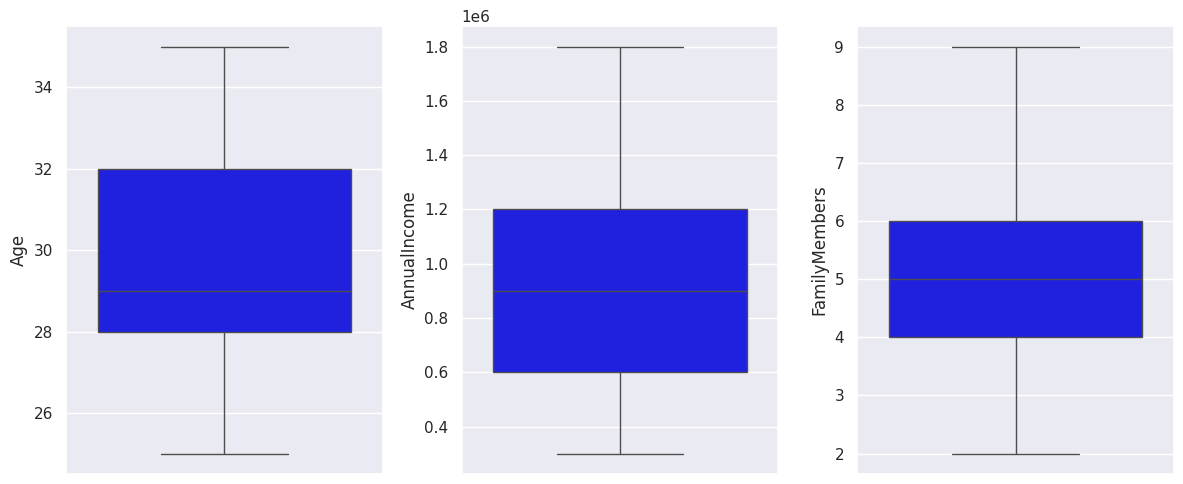

In [ ]:
#boxplot

features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

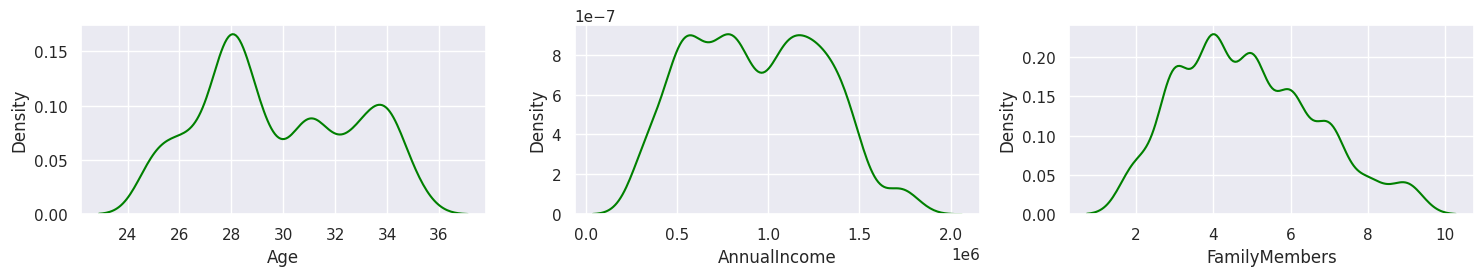

In [ ]:
#displot

plt.figure(figsize=(15,5))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.kdeplot(x=df[num[i]], color='green')
    plt.xlabel(num[i])
    plt.tight_layout()

plt.show()

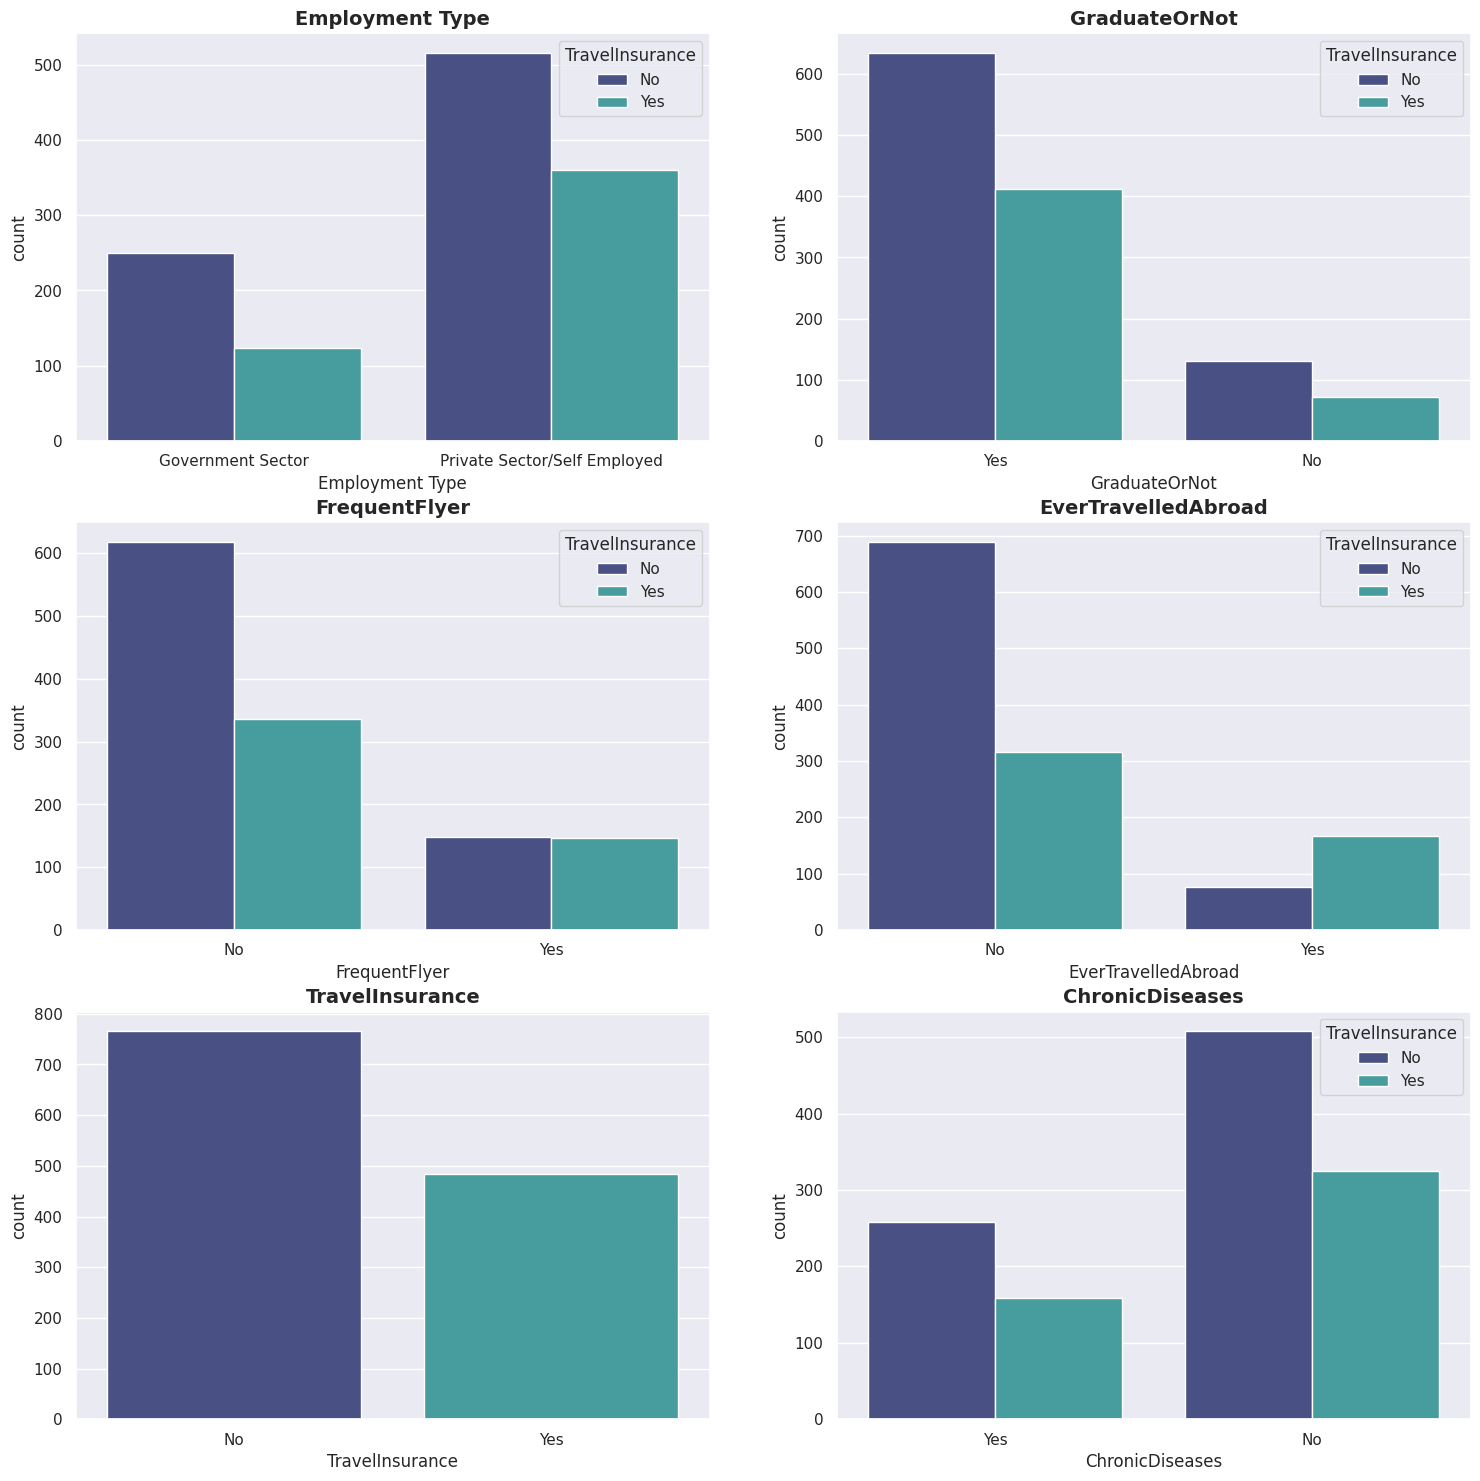

In [ ]:
# Categorical
plt.figure(figsize=(18,18))
for i in range(0, len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cat[i]], hue = df['TravelInsurance'], palette="mako")
    # Set plot title
    plt.title(cat[i], weight='bold', fontsize = 14)

In [ ]:
#Value Counting
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
Private Sector/Self Employed    876
Government Sector               373
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
Yes    1047
No      202
Name: GraduateOrNot, dtype: int64

Value count kolom FrequentFlyer:
No     954
Yes    295
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
No     1005
Yes     244
Name: EverTravelledAbroad, dtype: int64

Value count kolom TravelInsurance:
No     766
Yes    483
Name: TravelInsurance, dtype: int64

Value count kolom ChronicDiseases:
No     833
Yes    416
Name: ChronicDiseases, dtype: int64



**Interpretasi Data**

1. Baik customer yang bekerja di Pemerintahan maupun Swasta cenderung tidak membeli Asuransi Perjalanan. Namun rasio pembelian Asuransi Perjalanan di Sektor Swasta lebih tinggi lebih dari 2 kali lipat dibandingkan Pemerintah.
2. Tidak terdapat perbedaan yang signifikan dalam keputusan pembelian Asuransi Perjalanan antara customer yang tamat sarjana dan yang tidak.
3. customer yang mengidap Penyakit Kronis atau tidak tampaknya tidak memiliki pengaruh yang signifikan terhadap kecenderungan customer untuk membeli Asuransi Perjalanan.
4. Not Frequent flyer, atau pelanggan yang tidak sering bepergian, memiliki potensi yang lebih tinggi untuk membeli asuransi. Namun, Frequent Flyer masih memiliki potensi untuk membeli asuransi
5. Pelanggan yang pernah bepergian ke luar negeri cenderung membeli Asuransi Perjalanan.

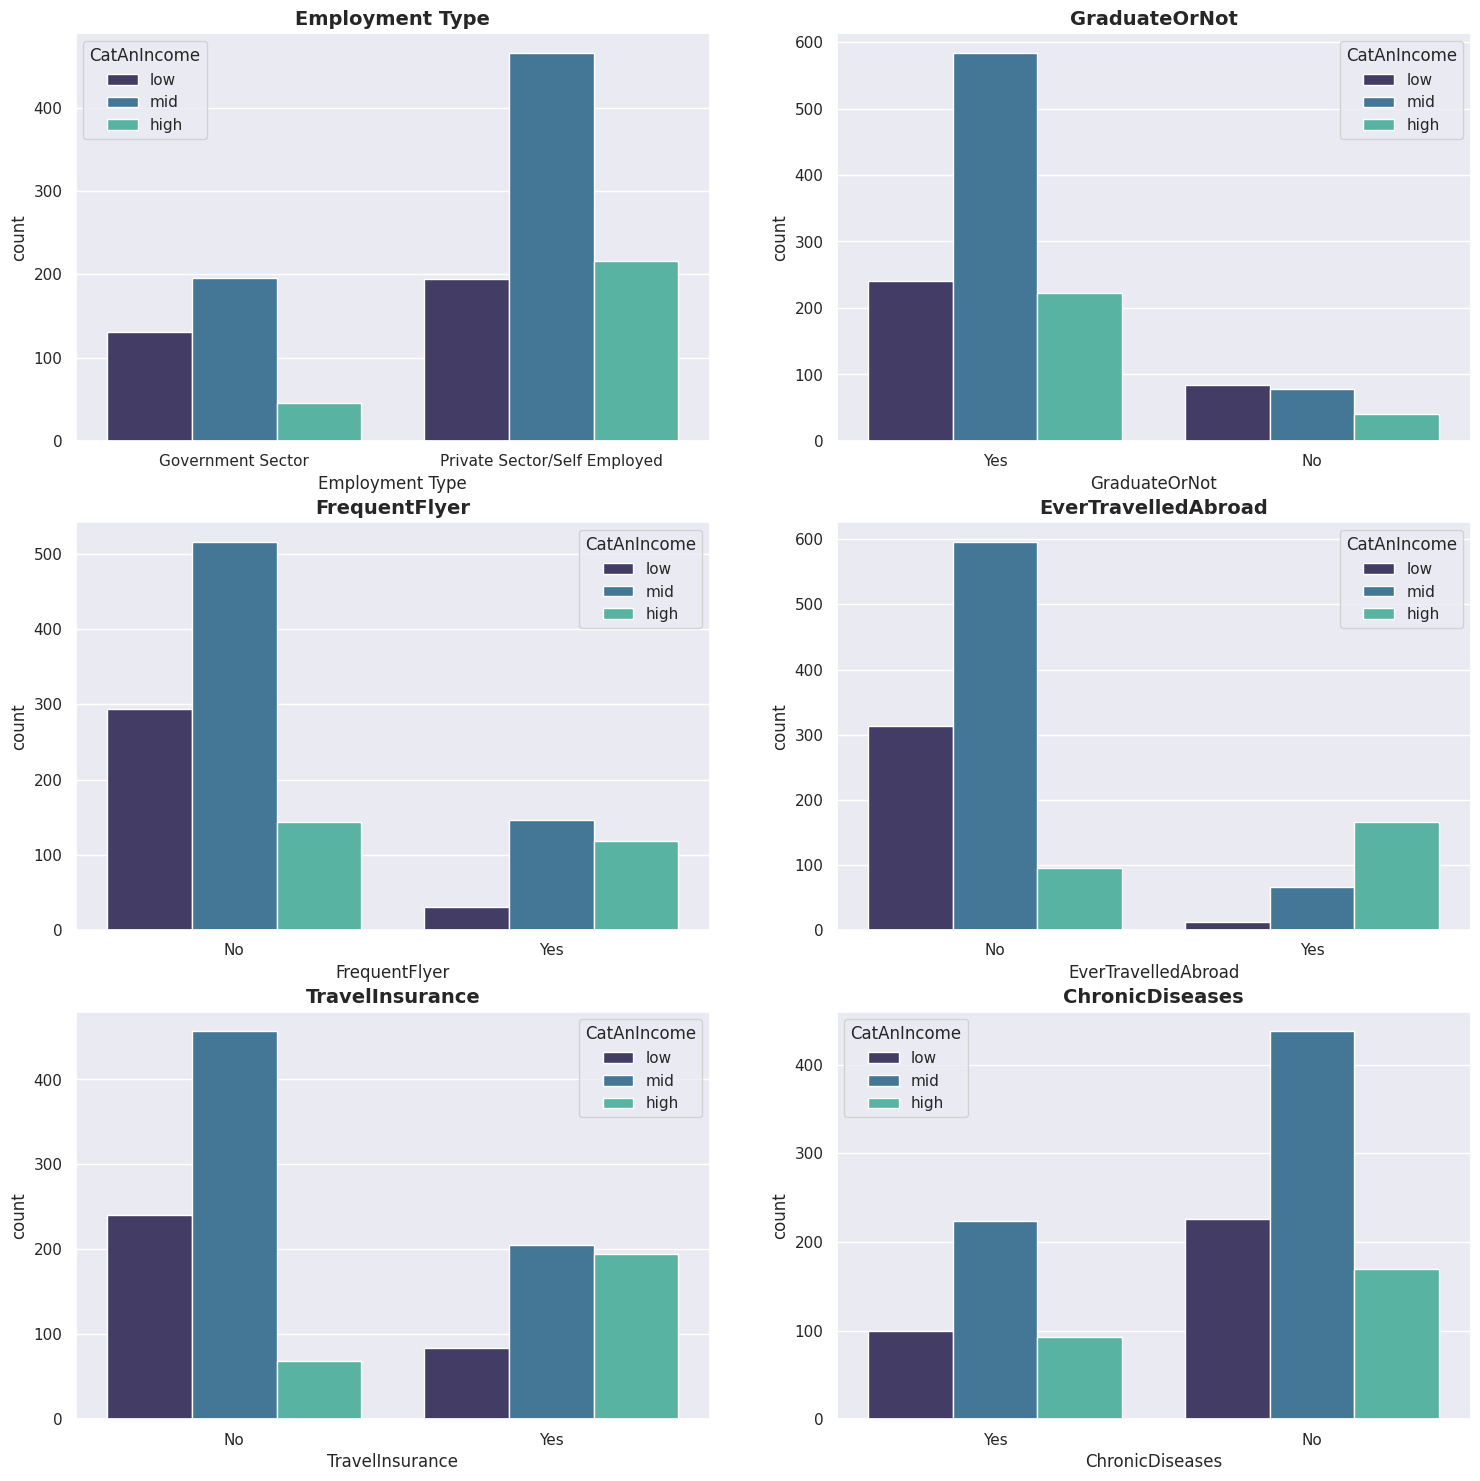

In [ ]:
# Categorical
plt.figure(figsize=(18,18))
for i in range(0, len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cat[i]], hue = df['CatAnIncome'], palette="mako")
    # Set plot title
    plt.title(cat[i], weight='bold', fontsize = 14)

In [ ]:
import plotly.express as px
g = df.groupby('Age')
interim_df = g.mean().reset_index()
px.bar(
         interim_df,
         x='Age',
         y='AnnualIncome',
         color_discrete_sequence=['blue'],
         title='Average income by age'
      )

<ipython-input-56-5c12b97b8e94>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
income_greater = df[df['AnnualIncome']>1300000].groupby('Age').size()
income_greater = income_greater.reset_index(name='Total people whose Annual Income is greater than 1.3M')
px.bar(income_greater,
         x='Age',
         y='Total people whose Annual Income is greater than 1.3M',
         color_discrete_sequence=['#0CF3CD'],
         title='Age group of people earning more than 1.3M'
      )

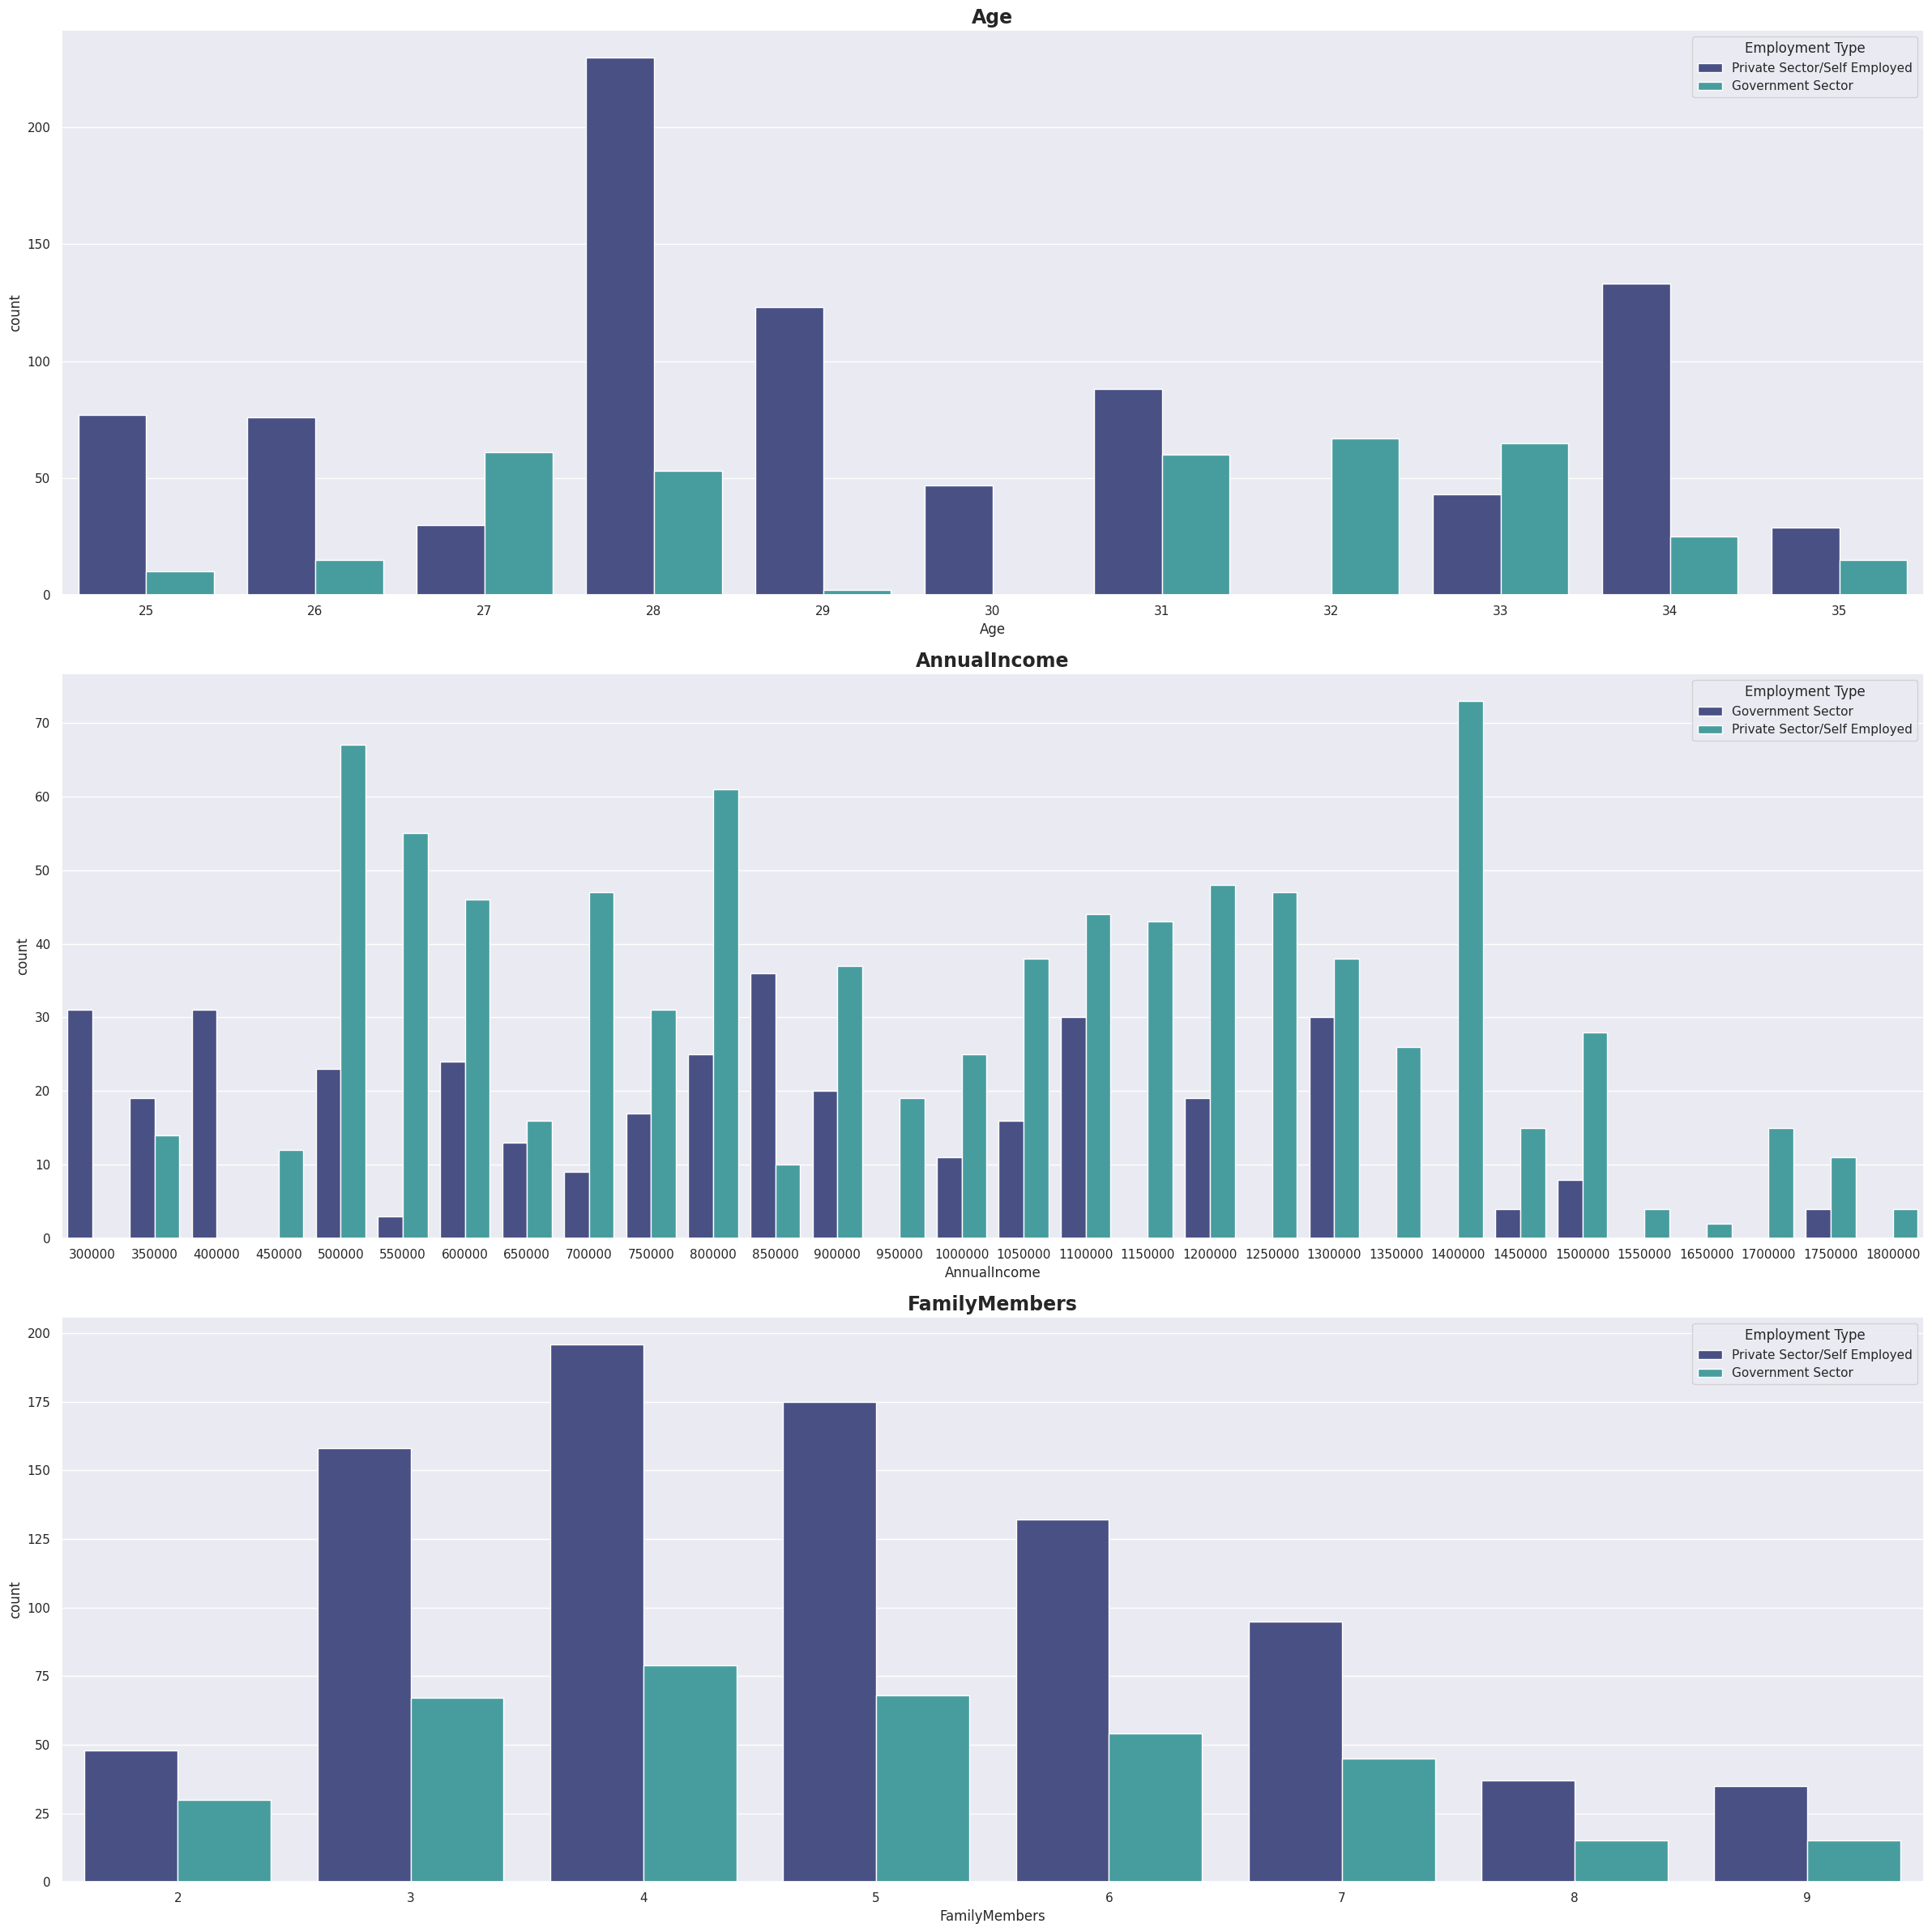

In [ ]:
# Numerical
plt.figure(figsize=(24,24))
for i in range(0, len(num)):
    plt.subplot(3,1,i+1)
    sns.countplot(data=df, x=df[num[i]], hue = df['Employment Type'], palette="mako")
    # Set plot title
    plt.title(num[i], weight='bold', fontsize = 17)
    # Rotate x-tick labels 90 degrees
    #plt.xticks(rotation=15)
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="FamilyMembers", color= "TravelInsurance", title= "Factors affecting purchase of travel insurance: FamilyMembers")
figure.show()

<Figure size 400x400 with 0 Axes>

**Interpretasi Data**
1. Jumlah Family member yang beranggotakan 4 orang kebanyakan membeli asuransi perjalanan, dibandingkan dengan jumlah anggota yang lain.
2. Semakin banyak anggota keluarga, peminat asuransi perjalanan semakin menurun.

### 3. Multivariate Analysis

<ipython-input-68-b388f2f040e1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



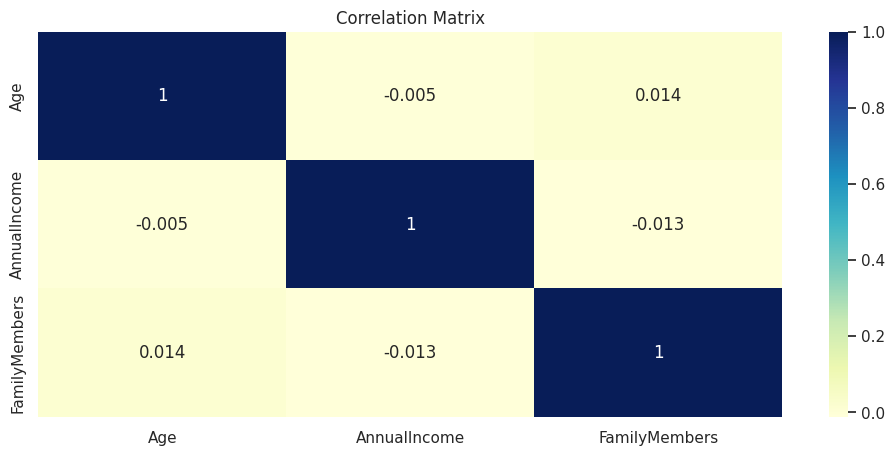

In [ ]:
# Matriks korelasi
correlation_matrix = df.corr()

# Heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

<Figure size 1500x1500 with 0 Axes>

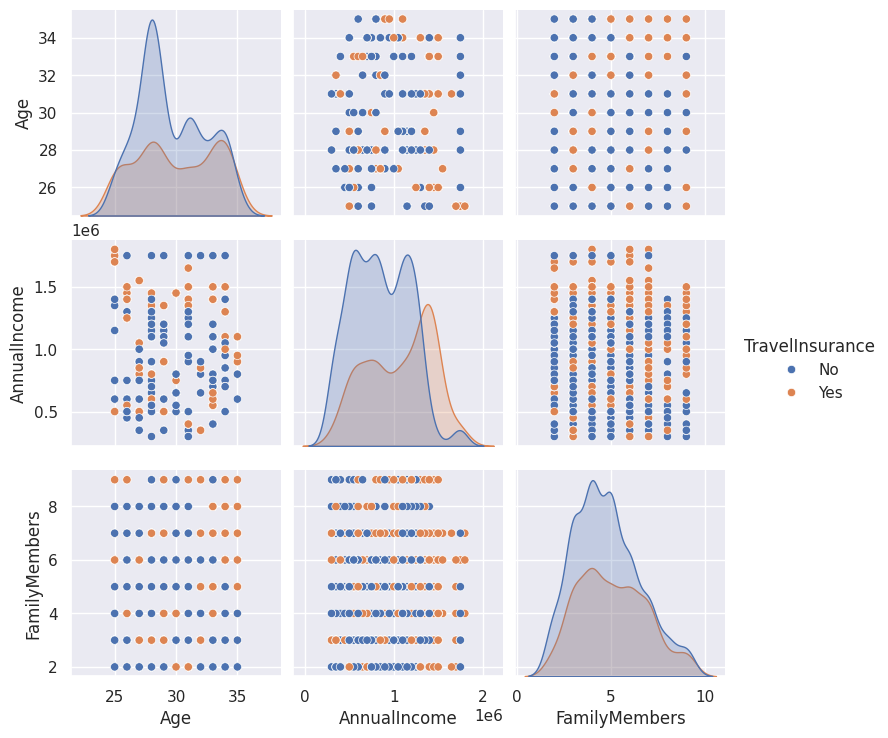

In [ ]:
# Pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='TravelInsurance');

Dari corelation heat map diatas dapat dilihat bahwa:
1. Tidak ada kolom numeric yang berkorelasi tinggi satu sama lain.
2. Annual Income dan FamilyMembers memiliki korelasi negatif yang rendah.
3. Annual Income dan Umur memiliki korelasi negatif yang rendah.

In [ ]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "FamilyMembers", title= "Factors affecting purchase of travel insurance: age")
figure.show()

<Figure size 400x400 with 0 Axes>

In [ ]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "TravelInsurance", title= "Factors affecting purchase of travel insurance: age")
figure.show()

<Figure size 400x400 with 0 Axes>

Pengamatan pengaruh `Age` terhadap purchasing `Travel Insurance`

TOP Pelanggan yang sering melakukan pembelian travel insurance berdasarkan umur : <br>
   a. Umur 28 <br>
   b. Umur 34 <br>
   c. Umur 31

In [ ]:
import plotly.express as px
plt.figure(figsize=(4, 4))
figure=px.histogram(df, x="Age", color= "EverTravelledAbroad", title= "Factors affecting purchase of travel insurance: age")
figure.show()

<Figure size 400x400 with 0 Axes>

Pengamatan pengaruh `Age` terhadap `Ever Travelled Abroad`

TOP pelanggan yang sering bepergian keluar negeri berdasarkan Umur  : <br>
   a. Umur 31 <br>
   b. Umur 29 <br>
   c. Umur 34

**Summary**

1. Pekerjaan dan Pembelian Asuransi Perjalanan:
> - Customer yang bekerja di sektor swasta cenderung lebih membeli asuransi perjalanan dibandingkan dengan mereka yang bekerja di pemerintahan.
> - Rasio pembelian asuransi perjalanan di sektor swasta lebih tinggi lebih dari 2 kali lipat dibandingkan dengan sektor pemerintah.

2. Pendidikan dan Pembelian Asuransi Perjalanan:
> - Tidak ada perbedaan signifikan dalam keputusan pembelian asuransi perjalanan antara customer yang tamat sarjana dan yang tidak.

3. Pengaruh Penyakit Kronis:
> - Tidak terlihat pengaruh signifikan dari keberadaan penyakit kronis terhadap kecenderungan customer untuk membeli asuransi perjalanan.

4. Frekuensi Terbang dan Pembelian Asuransi:
> - Pelanggan yang bukan frequent flyer (tidak sering bepergian) memiliki potensi lebih tinggi untuk membeli asuransi perjalanan. Meskipun begitu, pelanggan frequent flyer masih memiliki potensi untuk membeli asuransi perjalanan.

5. Perjalanan ke Luar Negeri dan Pembelian Asuransi:
> - Customer yang pernah bepergian ke luar negeri cenderung lebih mungkin membeli asuransi perjalanan.

6. Jumlah Anggota Keluarga dan Pembelian Asuransi:
> - Keluarga yang terdiri dari 4 anggota memiliki kecenderungan lebih tinggi untuk membeli asuransi perjalanan dibandingkan dengan jumlah anggota keluarga yang lain.
> - Semakin banyak anggota keluarga, kecenderungan untuk membeli asuransi perjalanan cenderung menurun.

7. Pengaruh Umur
> - Usia 25 memiliki Annual Income tertinggi. Pada umur ini rata-rata customer sedang masuk di tahap berada pada jenjang karir yang sudah dibangun dan berusaha untuk membuat stable secara karir maupun financial.
> - Usia 28 banyak membeli travel insurance dan memiliki banyak family member dibanding umur yang lain.
> - Umur 34 berada pada urutan kedua dalam membeli travel insurance dan memiliki jumlah anggota keluarga terbanyak, dengan annual income tertinggi ke 2. Hal tersebut memungkinkan karena pada rata-rata pada umur 34 tahun sudah berkeluarga dan sudah ditahap financially stable dengan posisi pekerjaannya.
> - Umur 31 memiliki jumlah pembeli travel insurance terbanyak yang pernah berpergian keluar negeri, kedua umur 29 dan 34.

### 4. Business Insight

**Business Insight**

1. Perusahaan dapat mempertimbangkan untuk mengarahkan strategi pemasaran asuransi perjalanan lebih khusus ke pelanggan di sektor swasta, mengingat rasio pembelian yang lebih tinggi di sektor ini.
2. Perusahaan tidak perlu mempertimbangkan lebih jauh mengenai tingkat pedidikan, karena tidak ada perbedaan yang signifikan terhadap keputusan pembelian.
3. Meskipun penyakit kronis tidak tampak mempengaruhi keputusan pembelian, perusahaan dapat mempertimbangkan penawaran atau manfaat asuransi yang lebih menarik bagi pelanggan dengan kondisi kesehatan tertentu.
4. Perusahaan dapat mempertimbangkan strategi pemasaran yang menawarkan berbagai promo untuk paket wisata dengan menargetkan customer yang tidak sering berpergian dan yang belum pernah berpergian ke luar negeri.
5. Perusahaan dapat menawarkan paket asuransi keluarga khususnya untuk keluarga beranggotakan 4 orang.
6. Perusahaan dapat menawarkan paket member travel insurance dengan segmen annual income.

